# Loading and Processing Stock-Market Time-Series Data

In this notebook we’ll show you how we generate pseudo-random time-series, download actual stock-market time series from a common provider, and how we can compute time-series similarity measures. We use these data as samples, and they could be easily replaced by real stock values in concrete situations. The notebook code snippets we will execute are based on an existing repository, you can find this repository and more information via https://github.com/Qiskit/qiskit-finance/blob/stable/0.3/docs/tutorials/11_time_series.ipynb. 

### Pseudo-random time-series

First, we import all the requirements and modules needed for our Qiskit notebook.

In [1]:
%matplotlib inline
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import *
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

Next, we create a dataset where we declare two stock tickers and the start and end time for the period we want to analyse our stock tickers. A stock ticker reports transaction and price data for a security, thus a financial instrument, updated continuously throughout the determined period. The dataset we declare is our time-series.

In [2]:
data = RandomDataProvider(
    tickers=["STOCKTICKER1", "STOCKTICKER2"],
    start=datetime.datetime(2016, 1, 1),
    end=datetime.datetime(2016, 1, 30),
    seed=1,
)
data.run()

Now that the dataset is loaded, we can work with it and run a variety of computations or algorithms on the dataset. We will compute the covariance matrix, a square matrix giving the covariance between each pair of elements of a given random vector, which considers alternative time-series similarity measures based on dynamic time warping (DTW). In DTW, changes that vary in speed, e.g., one stock's price following another stock's price with a small delay, can be accommodated.

Means:
[33.97683271 97.61130683]
A time-series similarity measure:
[[1.00000000e+00 5.41888011e-04]
 [5.41888011e-04 1.00000000e+00]]


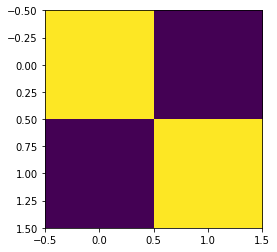

A covariance matrix:
[[2.08413157 0.20842107]
 [0.20842107 1.99542187]]


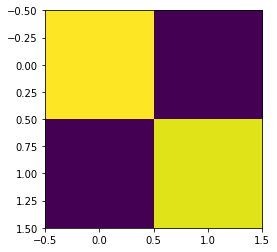

In [3]:
means = data.get_mean_vector()
print("Means:")
print(means)

rho = data.get_similarity_matrix()
print("A time-series similarity measure:")
print(rho)
plt.imshow(rho)
plt.show()

cov = data.get_covariance_matrix()
print("A covariance matrix:")
print(cov)
plt.imshow(cov)
plt.show()

Next, we can also look into the underlying evolution of the stock prices in our used pseudo-random time-series.

The underlying evolution of stock prices:


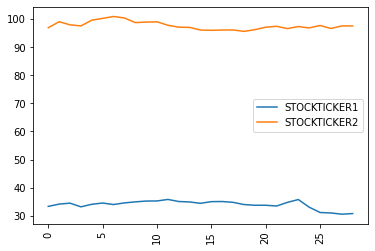

STOCKTICKER1
[33.345584192064784, 34.167202335565946, 34.49763941174933, 33.19448218014497, 34.099838046818086, 34.5462126191821, 34.009259383821814, 34.59037748801817, 34.95494988420424, 35.24908238085977, 35.27750462217556, 35.82421760878801, 35.08776352178634, 34.92485357379329, 34.442734261113316, 35.04158047374794, 35.0813025812296, 34.78884583026451, 34.00693736790767, 33.7497451272888, 33.757887307807145, 33.48228440250777, 34.77634821690598, 35.783072532211776, 33.07191005324581, 31.182896807278134, 31.008124715222973, 30.585934303646617, 30.799577301145227]
STOCKTICKER2
[96.8774156647853, 98.99525441983634, 97.88323365714406, 97.50562865001707, 99.5484002575094, 100.19510325371124, 100.85816662608751, 100.34416025440004, 98.69608508354439, 98.86354982776713, 98.97256391558868, 97.7452118613441, 97.06198519956354, 96.98994151983632, 96.04518989677554, 95.94691992892332, 96.04240295639278, 96.07798919344826, 95.57169753513395, 96.16544560691977, 97.0566125612021, 97.377460865768

In [4]:
print("The underlying evolution of stock prices:")
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

for (cnt, s) in enumerate(data._tickers):
    print(s)
    print(data._data[cnt])

Last, we can experiment and choose a different kind of dataset. We now choose to create three stock tickers and a different period to analyse these stock tickers, also notice that we have adapted the stock ticker names to create a more suitable graphic.

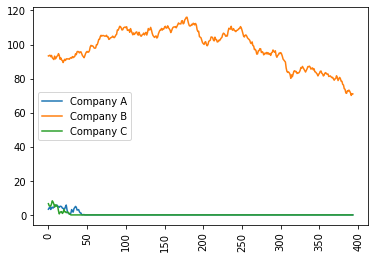

In [5]:
data = RandomDataProvider(
    tickers=["Company A", "Company B", "Company C"],
    start=datetime.datetime(2015, 1, 1),
    end=datetime.datetime(2016, 1, 30),
    seed=1,
)
data.run()
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Actual historical closing-price time-series

_! Note that the output of the following code will give error messages. This is because you need to insert an API kery first !_

Normally the access to real-time data requires a subscription or a payment, it’s possible to access historical data for free through a number of common providers. We will access historical time-series via Wikipedia and Quandl following registration at https://www.quandl.com/?modal=register. Upon registration you receive an API key from Quandl, this API key can be used in the code below to make a connection to their API to request a dataset of stock tickers from their database. To include your own API key in the code you need to replace “REPLACE ME” with your own API key, make sure to leave the quotation marks present for correct interpretation.

In [6]:
stocks = ["GOOG", "AAPL"]

token = "REPLACE ME"
if token == "REPLACE ME":
    try:
        wiki = WikipediaDataProvider(
            token=token,
            tickers=stocks,
            start=datetime.datetime(2016, 1, 1),
            end=datetime.datetime(2016, 1, 30),
        )
        wiki.run()
    except QiskitFinanceError as ex:
        print(ex)
        print("Error retrieving data.")

'Quandl invalid token.'
Error retrieving data.


We use two stock tickers so we can compute the covariance and time-series matrices, but note that hundreds of tickers may go beyond the fair usage limits of Quandl. In the code below you can see our computations.

In [7]:
if token == "REPLACE ME":
    if wiki._data:
        if wiki._n <= 1:
            print(
                "Not enough wiki data to plot covariance or time-series similarity." 
                "Please use at least two tickers."
            )
        else:
            rho = wiki.get_similarity_matrix()
            print("A time-series similarity measure:")
            print(rho)
            plt.imshow(rho)
            plt.show()

            cov = wiki.get_covariance_matrix()
            print("A covariance matrix:")
            print(cov)
            plt.imshow(cov)
            plt.show()
    else:
        print("No wiki data loaded.")

No wiki data loaded.


Next, we can look into the underlying evolution of the stock prices in our actual historical closing-price time-series.

In [8]:
if token == "REPLACE ME":
    if wiki._data:
        print("The underlying evolution of stock prices:")
        for (cnt, s) in enumerate(stocks):
            plt.plot(wiki._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()

        for (cnt, s) in enumerate(stocks):
            print(s)
            print(wiki._data[cnt])
    else:
        print("No wiki data loaded.")

No wiki data loaded.
